<a href="https://colab.research.google.com/github/jsuj1th/Colab/blob/main/DL/Assignments/DL_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regulariations mentioned in the codebook are
L1, L2,L1-L2, dropout

In [23]:
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



In [24]:
import numpy as np
import random

def create_mixed_images(label1_images, label2_images, num_pairs):
    mixed_images = []
    num_pairs = min(len(label1_images), len(label2_images), num_pairs)
    for i in range(num_pairs):
        img1 = label1_images[i]
        img2 = label2_images[i]
        mixed_image = ((img1 + img2) / 2).astype(np.uint8)
        mixed_images.append(mixed_image)
    return mixed_images
train_images_by_label = {i: [] for i in range(10)}
test_images_by_label = {i: [] for i in range(10)}

for i, label in enumerate(train_labels):
    train_images_by_label[label].append(train_images[i])

for i, label in enumerate(test_labels):
    test_images_by_label[label].append(test_images[i])

label_pairs = [(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]

new_train_images = []
new_train_labels = []
new_test_images = []
new_test_labels = []

for new_label, (label1, label2) in enumerate(label_pairs):
    mixed_train_images = create_mixed_images(train_images_by_label[label1], train_images_by_label[label2], 6000)
    mixed_test_images = create_mixed_images(test_images_by_label[label1], test_images_by_label[label2], 1000)

    new_train_images.extend(mixed_train_images)
    new_train_labels.extend([new_label] * len(mixed_train_images))

    new_test_images.extend(mixed_test_images)
    new_test_labels.extend([new_label] * len(mixed_test_images))

new_train_images = np.array(new_train_images)
new_train_labels = np.array(new_train_labels)
new_test_images = np.array(new_test_images)
new_test_labels = np.array(new_test_labels)

print(f"New training dataset size: {new_train_images.shape}, New labels size: {new_train_labels.shape}")
print(f"New test dataset size: {new_test_images.shape}, New labels size: {new_test_labels.shape}")


num_classes = 5
train_labels_onehot = to_categorical(new_train_labels, num_classes)
test_labels_onehot = to_categorical(new_test_labels, num_classes)

New training dataset size: (29071, 28, 28), New labels size: (29071,)
New test dataset size: (4804, 28, 28), New labels size: (4804,)


In [25]:
print(new_test_images.shape)
# print(new_train_labels.shape)
# print(new_test_images.shape)
# print(new_test_labels.shape

(4804, 28, 28)


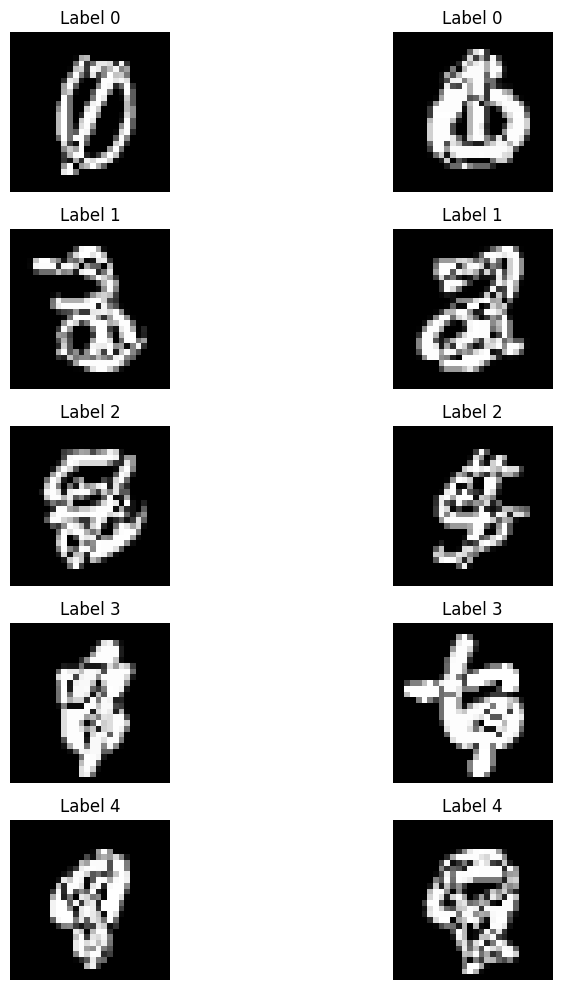

In [26]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))
for label in range(5):
    label_images = new_train_images[new_train_labels == label]

    selected_images = random.sample(list(label_images), 2)

    for i in range(2):
        axes[label, i].imshow(selected_images[i], cmap='gray')
        axes[label, i].axis('off')
        axes[label, i].set_title(f"Label {label}")

plt.tight_layout()
plt.show()

In [27]:
# # prompt: print one image from combined_test_imgs and it's label

# import matplotlib.pyplot as plt

# # Assuming combined_test_imgs is defined as in the previous code
# # and contains a list of tuples (image, label)

# # Access the first image and its label
# first_image, first_label = combined_test_imgs[4500]

# # Display the image
# plt.imshow(first_image, cmap='gray')
# plt.title(f"Label: {first_label}")
# plt.show()


In [30]:
# print(new_train_labels.shape)
# print(new_train_images.shape)
# print(new_test_labels.shape)
# print(new_test_images.shape)
new_train_images=new_train_images.reshape(-1, 28, 28, 1)
new_test_images=new_test_images.reshape(-1, 28, 28, 1)
new_train_labels=to_categorical(new_train_labels)
new_test_labels=to_categorical(new_test_labels)
print(new_train_labels.shape)
print(new_train_images.shape)
print(new_test_labels.shape)
print(new_test_images.shape)

(29071, 5)
(29071, 28, 28, 1)
(4804, 5)
(4804, 28, 28, 1)


In [31]:
from sklearn.model_selection import train_test_split
x_train_mixed,x_val,y_train_mixed,y_val = train_test_split(new_train_images,new_train_labels,test_size=0.2,random_state=33)

In [46]:
from tensorflow.keras.regularizers import l1_l2, l2, l1
from tensorflow.keras import layers, models, optimizers
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    # layers.Dense(64, activation="relu",
    #              kernel_regularizer=l2( l2=0.01)),
    layers.Dense(150, activation="relu"),
    layers.Dropout(0.3),
    # layers.Dense(64, activation="relu",
    #              kernel_regularizer=l2( l2=0.01)),
    layers.Dense(64, activation="relu"),
    layers.Dense(5, activation="softmax")
])
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=["accuracy"])
ep=5
model_history=model.fit(new_train_images, new_train_labels,
          epochs=ep, batch_size=40,validation_data=(x_val,y_val))


Epoch 1/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6689 - loss: 5.7178 - val_accuracy: 0.8648 - val_loss: 0.4448
Epoch 2/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8228 - loss: 0.5333 - val_accuracy: 0.8982 - val_loss: 0.3173
Epoch 3/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8642 - loss: 0.4174 - val_accuracy: 0.9181 - val_loss: 0.2573
Epoch 4/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8816 - loss: 0.3823 - val_accuracy: 0.9319 - val_loss: 0.2406
Epoch 5/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8950 - loss: 0.3329 - val_accuracy: 0.9345 - val_loss: 0.2003


During the process, I observed that the model is overfitting. So, I used regularization techniques like L2 and droupout to overcome it and it helped in increasing the model's validation accuracy.
Increasing the number of layers is leading to overfitting the model. So, these are the optimal hyper parameters I have found.

In [45]:
test_loss, test_acc=model.evaluate(new_test_images, new_test_labels)
print(f'Test accuracy: {test_acc:.2f}')

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9454 - loss: 0.1620
Test accuracy: 0.93


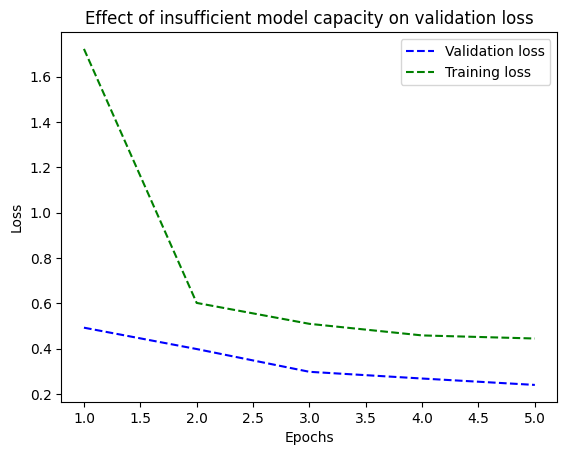

In [42]:
val_loss=model_history.history['val_loss']
training_loss=model_history.history['loss']
# loss=model.history['loss
epochs = range(1, ep+1)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.plot(epochs, training_loss, "g--",
         label="Training loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

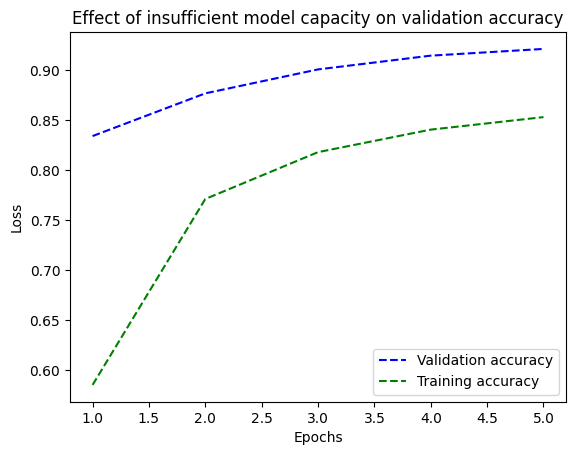

In [43]:
val_accuracy=model_history.history['val_accuracy']
training_accuracy=model_history.history['accuracy']
# loss=model.history['loss
epochs = range(1, ep+1)
plt.plot(epochs, val_accuracy, "b--",
         label="Validation accuracy")
plt.plot(epochs, training_accuracy, "g--",
         label="Training accuracy")
plt.title("Effect of insufficient model capacity on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()